# Modeling

Testing different classification models to see which is best for use

## Imports

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load Data

In [195]:
path  = "../data/raw/Titanic-Dataset.csv"
df = pd.read_csv(path)

In [196]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Processing

In [198]:
df.set_index("PassengerId", inplace=True)

In [199]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [200]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [201]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

In [202]:
cabin_p1 = []
cabin_p2 = []
cabin_p3 = []

# Find the first letter of the cabin for each passenger class
for i in df[df["Pclass"] == 1]["Cabin"]:
    if isinstance(i, str):
        cabin_p1.append(i[0])
for i in df[df["Pclass"] == 2]["Cabin"]:
    if isinstance(i, str):
        cabin_p2.append(i[0])
for i in df[df["Pclass"] == 3]["Cabin"]:
    if isinstance(i, str):
        cabin_p3.append(i[0])

cabin_p1 = set(cabin_p1)
cabin_p2 = set(cabin_p2)
cabin_p3 = set(cabin_p3)

def fill_cabin(row):
    num = np.random.randint(0, 99) 
    if pd.isnull(row["Cabin"]) or isinstance(row["Cabin"], float):
        if row["Pclass"] == 1:
            row["Cabin"] = np.random.choice(list(cabin_p1)) + str(num)
        elif row["Pclass"] == 2:
            row["Cabin"] = np.random.choice(list(cabin_p2)) + str(num)
        elif row["Pclass"] == 3:
            row["Cabin"] = np.random.choice(list(cabin_p3)) + str(num)
    return row

In [203]:
df = df.apply(fill_cabin, axis=1)

In [204]:
df["Cabin"] = df["Cabin"].apply(lambda x: x[0])

In [205]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

## Feature Engineering

In [206]:
df["Name"] = df["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())
df.rename(columns={"Name": "Title"}, inplace=True)

In [207]:
df["Family_Size"] = df["SibSp"] + df["Parch"] + 1

In [208]:
df["Is_Alone"] = df["Family_Size"].apply(lambda x: 1 if x == 1 else 0)

In [209]:
df["FarePerPerson"] = df["Fare"] / df["Family_Size"]

In [210]:
def age_group(age):
    if age < 12:
        return "Child"
    elif 12 <= age < 18:
        return "Teen"
    elif 18 <= age < 60:
        return "Adult"
    else:
        return "Senior"

In [211]:
df["Age_Group"] = df["Age"].apply(age_group)

In [212]:
df["Ticket_Frequency"] = df.groupby("Ticket")["Ticket"].transform("count")

In [213]:
df.head()

,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Is_Alone,FarePerPerson,Age_Group,Ticket_Frequency
PassengerId,,,,,,,,,,,,,,,,
1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,G,S,2,0,3.62500,Adult,1
2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C,C,2,0,35.64165,Adult,1
3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,E,S,1,1,7.92500,Adult,1
4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C,S,2,0,26.55000,Adult,2
5,0,3,Mr,male,35.0,0,0,373450,8.0500,E,S,1,1,8.05000,Adult,1


In [215]:
df.columns

Index(['Survived', 'Pclass', 'Title', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Is_Alone', 'FarePerPerson',
       'Age_Group', 'Ticket_Frequency'],
      dtype='object')

In [217]:
df.drop(columns = ["SibSp", "Parch", "Ticket", "Age", "FarePerPerson"], inplace=True)

### One Hot Encoding

In [218]:
model_df = pd.get_dummies(df, columns=["Sex", "Embarked", "Pclass", "Title", "Cabin", "Age_Group"], drop_first=True, dtype=int)

In [219]:
model_df.head()

,Survived,Fare,Family_Size,Is_Alone,Ticket_Frequency,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Age_Group_Child,Age_Group_Senior,Age_Group_Teen
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,7.2500,2,0,1,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,1,71.2833,2,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,7.9250,1,1,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1,53.1000,2,0,2,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,8.0500,1,1,1,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


## Scaling

In [220]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model_df["Fare"] = scaler.fit_transform(model_df[["Fare"]])
#model_df["FarePerPerson"] = scaler.fit_transform(model_df[["FarePerPerson"]])

## Correlation

In [221]:
model_df.corr().style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

,Survived,Fare,Family_Size,Is_Alone,Ticket_Frequency,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Title_Col,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Age_Group_Child,Age_Group_Senior,Age_Group_Teen
Survived,1.00,0.26,0.02,-0.20,0.04,-0.54,0.00,-0.15,0.09,-0.32,0.01,-0.03,0.01,-0.03,0.04,0.01,0.09,0.33,0.06,0.04,-0.55,0.34,0.04,-0.06,0.04,0.04,0.19,0.10,0.10,0.05,-0.18,-0.13,-0.02,0.11,-0.04,0.05
Fare,0.26,1.00,0.22,-0.27,0.35,-0.18,-0.12,-0.16,-0.12,-0.41,-0.00,-0.00,0.03,-0.02,0.00,-0.00,0.01,0.12,0.03,0.03,-0.18,0.11,-0.01,-0.02,0.02,0.04,0.41,0.35,0.02,-0.10,-0.19,-0.19,0.06,-0.00,0.04,-0.01
Family_Size,0.02,0.22,1.00,-0.69,0.75,-0.20,-0.06,0.08,-0.04,0.07,-0.03,-0.02,-0.02,-0.02,0.00,-0.03,0.37,0.11,-0.03,-0.02,-0.34,0.16,-0.02,-0.03,0.00,-0.02,-0.01,0.02,-0.07,-0.03,0.05,0.05,-0.02,0.43,-0.04,0.06
Is_Alone,-0.20,-0.27,-0.69,1.00,-0.46,0.30,0.09,0.03,-0.04,0.13,0.04,0.03,0.02,0.03,-0.04,0.04,-0.27,-0.06,0.04,0.03,0.40,-0.37,0.03,0.01,-0.04,0.03,-0.05,-0.10,-0.00,0.01,0.02,0.04,-0.03,-0.34,0.05,-0.06
Ticket_Frequency,0.04,0.35,0.75,-0.46,1.00,-0.15,-0.07,0.07,-0.06,0.02,-0.03,-0.02,-0.03,-0.02,-0.02,-0.03,0.31,0.11,-0.01,0.01,-0.27,0.09,-0.02,-0.02,0.01,0.03,0.05,0.06,-0.04,-0.00,-0.00,-0.01,-0.02,0.39,-0.06,0.05
Sex_male,-0.54,-0.18,-0.20,0.30,-0.15,1.00,-0.07,0.12,-0.06,0.14,0.03,0.02,0.04,0.02,-0.05,0.03,0.16,-0.69,-0.06,-0.05,0.87,-0.55,-0.05,0.06,0.02,-0.05,-0.12,-0.04,-0.05,-0.04,0.10,0.05,0.01,-0.07,0.07,-0.08
Embarked_Q,0.00,-0.12,-0.06,0.09,-0.07,-0.07,1.00,-0.50,-0.13,0.24,-0.01,-0.01,0.02,-0.01,-0.01,-0.01,0.01,0.17,-0.01,-0.01,-0.08,-0.09,-0.01,0.02,-0.01,-0.01,-0.08,-0.06,-0.09,-0.02,0.02,0.17,-0.03,-0.03,-0.01,-0.02
Embarked_S,-0.15,-0.16,0.08,0.03,0.07,0.12,-0.50,1.00,0.19,-0.02,-0.02,-0.05,-0.03,0.02,-0.05,0.03,0.02,-0.13,-0.08,-0.05,0.11,0.00,0.02,0.02,-0.05,0.02,-0.10,-0.06,0.04,0.10,0.06,-0.05,-0.06,0.04,0.00,-0.05
Pclass_2,0.09,-0.12,-0.04,-0.04,-0.06,-0.06,-0.13,0.19,1.00,-0.57,-0.02,-0.02,0.02,-0.02,-0.02,-0.02,0.01,-0.02,-0.02,-0.02,-0.09,0.12,0.07,0.16,-0.02,-0.02,-0.13,-0.14,0.35,0.09,0.11,-0.26,-0.05,0.03,-0.02,-0.04
Pclass_3,-0.32,-0.41,0.07,0.13,0.02,0.14,0.24,-0.02,-0.57,1.00,-0.05,-0.04,-0.10,-0.04,-0.04,-0.05,0.06,0.01,-0.05,-0.04,0.16,-0.17,-0.04,-0.09,-0.04,-0.04,-0.29,-0.31,-0.37,0.04,0.20,0.47,-0.10,0.08,-0.13,0.06


## Sampling to Even Out Observations

In [222]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## Modeling

### Train Test Split

In [223]:
target = "Survived"
features = model_df.drop(columns=["Survived"]).columns.to_list()

In [245]:
features

['Fare',
 'Family_Size',
 'Is_Alone',
 'Ticket_Frequency',
 'Sex_male',
 'Embarked_Q',
 'Embarked_S',
 'Pclass_2',
 'Pclass_3',
 'Title_Col',
 'Title_Don',
 'Title_Dr',
 'Title_Jonkheer',
 'Title_Lady',
 'Title_Major',
 'Title_Master',
 'Title_Miss',
 'Title_Mlle',
 'Title_Mme',
 'Title_Mr',
 'Title_Mrs',
 'Title_Ms',
 'Title_Rev',
 'Title_Sir',
 'Title_the Countess',
 'Cabin_B',
 'Cabin_C',
 'Cabin_D',
 'Cabin_E',
 'Cabin_F',
 'Cabin_G',
 'Cabin_T',
 'Age_Group_Child',
 'Age_Group_Senior',
 'Age_Group_Teen']

In [224]:
X = model_df[features]
y  = model_df[target]

In [225]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression w/ different Feature Selections

In [226]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



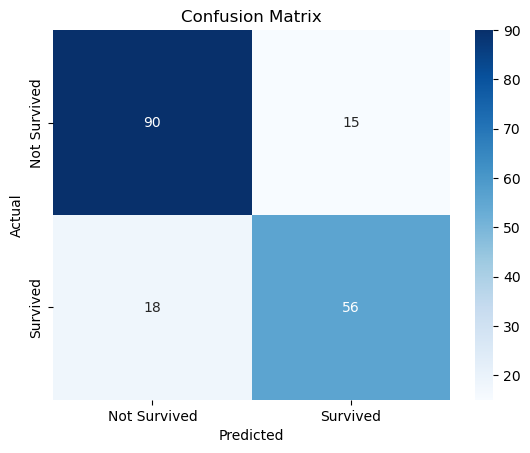

In [227]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

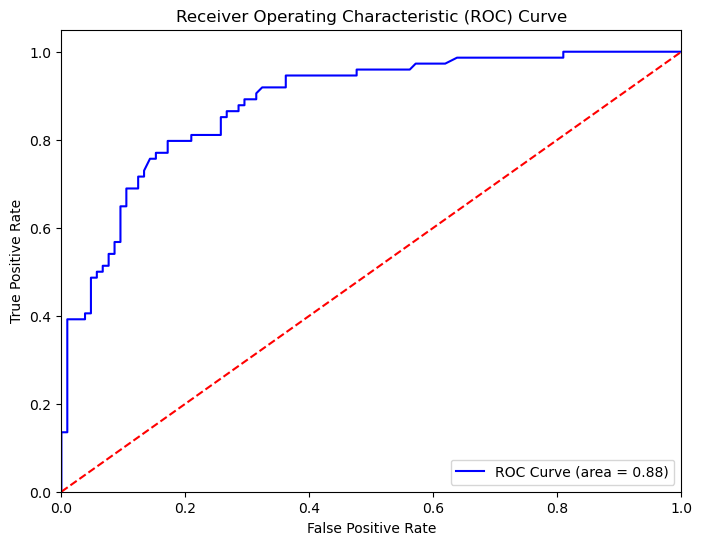

In [228]:
### ROC Curve
from sklearn.metrics import roc_curve, auc
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [229]:
import numpy as np

J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print(f'Optimal Threshold = {best_thresh:.2f}')

Optimal Threshold = 0.42


Accuracy with Optimal Threshold: 0.82
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       105
           1       0.77      0.80      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



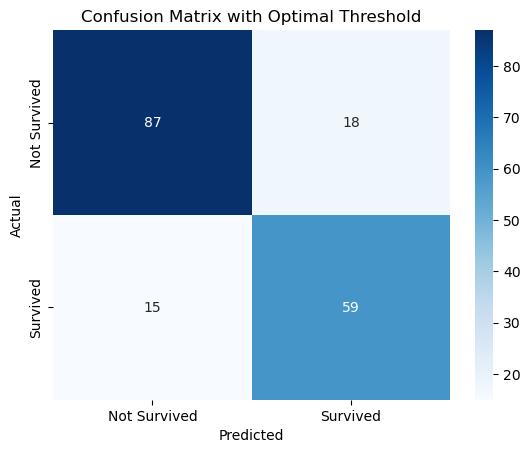

In [230]:
# Logistic Regression w/ Optimal Threshold
y_pred_optimal = (y_prob >= best_thresh).astype(int)
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print(f"Accuracy with Optimal Threshold: {accuracy_optimal:.2f}")
print(classification_report(y_test, y_pred_optimal))
confusion_optimal = confusion_matrix(y_test, y_pred_optimal)
sns.heatmap(confusion_optimal, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Optimal Threshold')
plt.show()

Selected Features: Index(['Fare', 'Family_Size', 'Is_Alone', 'Sex_male', 'Embarked_Q',
       'Title_Col', 'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Master'],
      dtype='object')
Accuracy after feature selection: 0.82
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



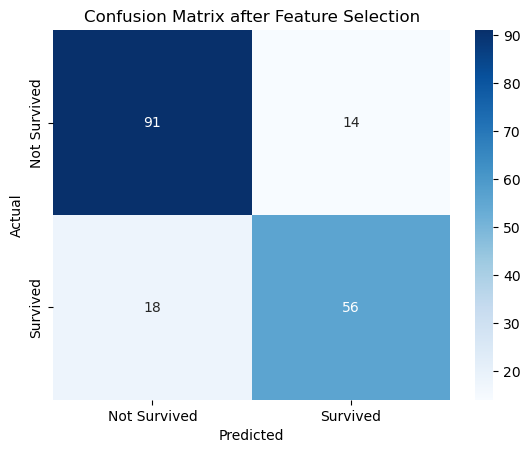

In [231]:
# Forward selection

from sklearn.feature_selection import SequentialFeatureSelector
sfs_forward = SequentialFeatureSelector(model, n_features_to_select=10, direction='forward', cv=5)
sfs_forward.fit(X_train, y_train)
selected_features_forward = X_train.columns[sfs_forward.get_support()]
print("Selected Features:", selected_features_forward)
selected_X_train_forward = X_train[selected_features_forward]
selected_X_test_forward = X_test[selected_features_forward]

model.fit(selected_X_train_forward, y_train)
y_pred = model.predict(selected_X_test_forward)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after feature selection: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after Feature Selection')
plt.show()

Selected Features after Backward Elimination: Index(['Fare', 'Family_Size', 'Pclass_3', 'Title_Master', 'Title_Mr',
       'Title_Mrs', 'Title_Rev', 'Cabin_F', 'Age_Group_Child',
       'Age_Group_Teen'],
      dtype='object')
Accuracy after backward elimination: 0.79
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       105
           1       0.76      0.70      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



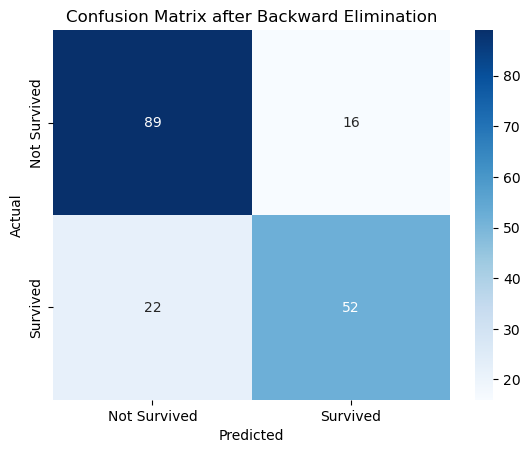

In [232]:
# Backward elimination
sfs_backward = SequentialFeatureSelector(model, n_features_to_select=10, direction='backward', cv=5)
sfs_backward.fit(X_train, y_train)
selected_features_backward = X_train.columns[sfs_backward.get_support()]
print("Selected Features after Backward Elimination:", selected_features_backward)
selected_X_train_backward = X_train[selected_features_backward]
selected_X_test_backward = X_test[selected_features_backward]
model.fit(selected_X_train_backward, y_train)
y_pred_backward = model.predict(selected_X_test_backward)
accuracy_backward = accuracy_score(y_test, y_pred_backward)
print(f"Accuracy after backward elimination: {accuracy_backward:.2f}")
print(classification_report(y_test, y_pred_backward))
confusion_backward = confusion_matrix(y_test, y_pred_backward)
sns.heatmap(confusion_backward, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after Backward Elimination')
plt.show()

## RFE

Selected Features after RFE: Index(['Sex_male', 'Embarked_S', 'Pclass_3', 'Title_Master', 'Title_Mr',
       'Title_Mrs', 'Title_Rev', 'Cabin_B', 'Cabin_T', 'Age_Group_Child'],
      dtype='object')
Accuracy after RFE: 0.79
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



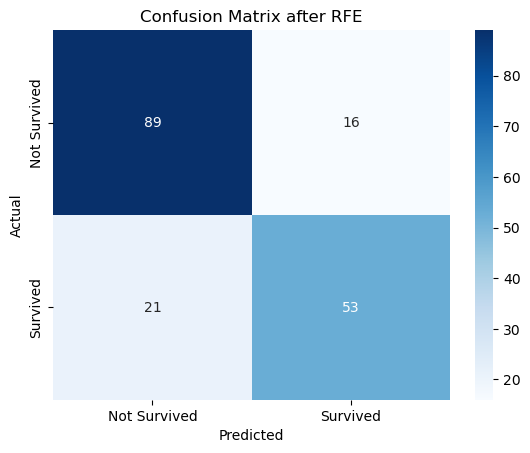

In [233]:
# RFE
from sklearn.feature_selection import RFE
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_train, y_train)
selected_features_rfe = X_train.columns[rfe.support_]
print("Selected Features after RFE:", selected_features_rfe)
selected_X_train_rfe = X_train[selected_features_rfe]
selected_X_test_rfe = X_test[selected_features_rfe]
model.fit(selected_X_train_rfe, y_train)
y_pred_rfe = model.predict(selected_X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
print(f"Accuracy after RFE: {accuracy_rfe:.2f}")
print(classification_report(y_test, y_pred_rfe))
confusion_rfe = confusion_matrix(y_test, y_pred_rfe)
sns.heatmap(confusion_rfe, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after RFE')
plt.show()

### Lasso Regression

Selected Features after Lasso Regression: Index(['Fare', 'Family_Size', 'Is_Alone', 'Ticket_Frequency', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3', 'Title_Master',
       'Title_Mr', 'Title_Mrs', 'Title_Rev', 'Cabin_B', 'Cabin_C', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_T', 'Age_Group_Child', 'Age_Group_Teen'],
      dtype='object')
Accuracy after Lasso Regression: 0.82
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



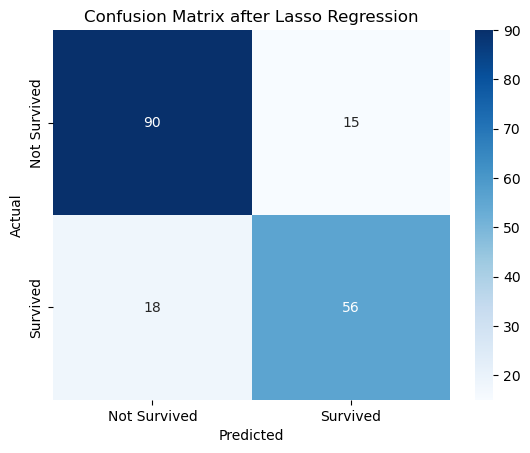

In [234]:
# Lasso Regression
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)
lasso_selected_features = X_train.columns[lasso.coef_ != 0]
print("Selected Features after Lasso Regression:", lasso_selected_features)
selected_X_train_lasso = X_train[lasso_selected_features]
selected_X_test_lasso = X_test[lasso_selected_features]
model.fit(selected_X_train_lasso, y_train)
y_pred_lasso = model.predict(selected_X_test_lasso)
accuracy_lasso = accuracy_score(y_test, y_pred_lasso)
print(f"Accuracy after Lasso Regression: {accuracy_lasso:.2f}")
print(classification_report(y_test, y_pred_lasso))
confusion_lasso = confusion_matrix(y_test, y_pred_lasso)
sns.heatmap(confusion_lasso, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after Lasso Regression')
plt.show()

### Ridge Regression

Selected Features after Ridge Regression: Index(['Fare', 'Family_Size', 'Is_Alone', 'Ticket_Frequency', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3', 'Title_Col',
       'Title_Dr', 'Title_Lady', 'Title_Major', 'Title_Master', 'Title_Miss',
       'Title_Mlle', 'Title_Mme', 'Title_Mr', 'Title_Mrs', 'Title_Ms',
       'Title_Rev', 'Title_the Countess', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Age_Group_Child',
       'Age_Group_Senior', 'Age_Group_Teen'],
      dtype='object')
Accuracy after Ridge Regression: 0.82
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



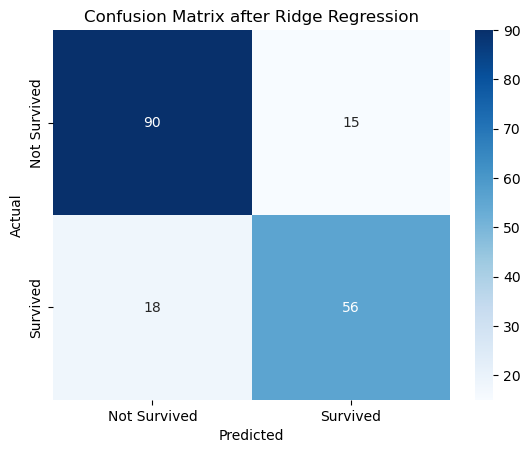

In [235]:
# Ridge Regression
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(cv=5)
ridge.fit(X_train, y_train)
ridge_selected_features = X_train.columns[ridge.coef_ != 0]
print("Selected Features after Ridge Regression:", ridge_selected_features)
selected_X_train_ridge = X_train[ridge_selected_features]
selected_X_test_ridge = X_test[ridge_selected_features]
model.fit(selected_X_train_ridge, y_train)
y_pred_ridge = model.predict(selected_X_test_ridge)
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
print(f"Accuracy after Ridge Regression: {accuracy_ridge:.2f}")
print(classification_report(y_test, y_pred_ridge))
confusion_ridge = confusion_matrix(y_test, y_pred_ridge)
sns.heatmap(confusion_ridge, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after Ridge Regression')
plt.show()

## Decision Tree

Accuracy of Decision Tree: 0.80
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



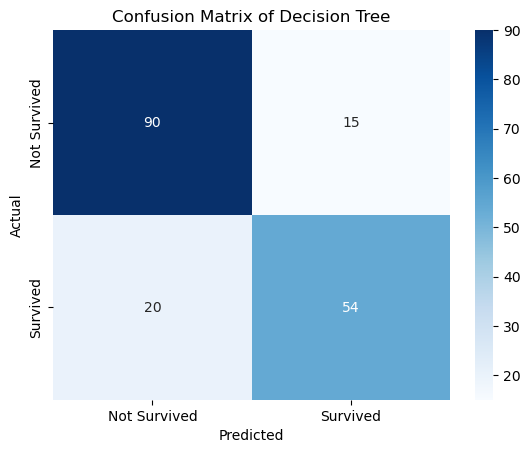

In [236]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy of Decision Tree: {accuracy_tree:.2f}")
print(classification_report(y_test, y_pred_tree))
confusion_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(confusion_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Decision Tree')
plt.show()

## Random Forest

Accuracy of Random Forest: 0.82
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



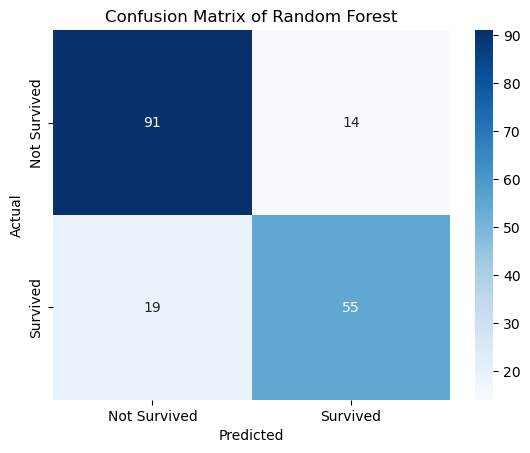

In [237]:
## Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, min_samples_split=10)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest: {accuracy_rf:.2f}")
print(classification_report(y_test, y_pred_rf))
confusion_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(confusion_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Random Forest')
plt.show()

## SVM Classifier

Accuracy of SVM: 0.82
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



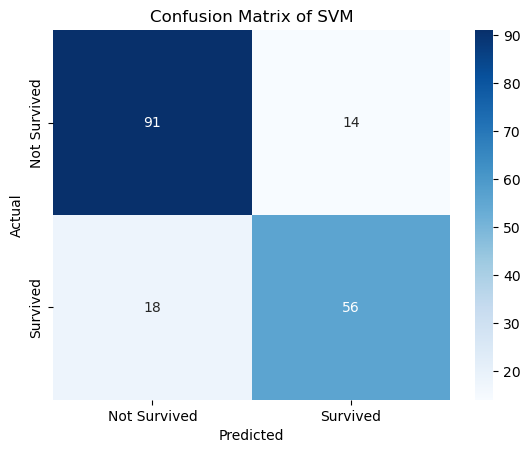

In [238]:
# Support Vector Machine Classifier
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of SVM: {accuracy_svm:.2f}")
print(classification_report(y_test, y_pred_svm))
confusion_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(confusion_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of SVM')
plt.show()

## XGBoost

Accuracy of XGBoost: 0.82
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



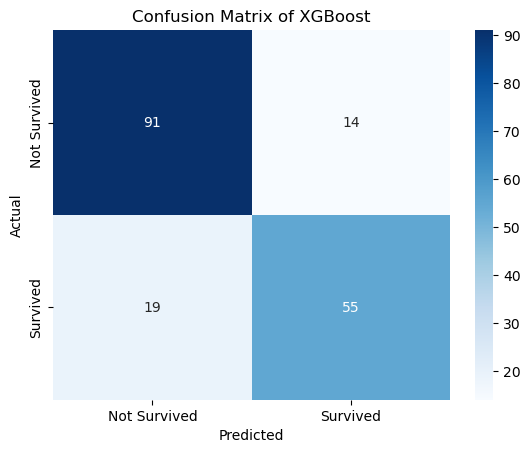

In [239]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_estimators=100, max_depth=5, learning_rate=0.1)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy of XGBoost: {accuracy_xgb:.2f}")
print(classification_report(y_test, y_pred_xgb))
confusion_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(confusion_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of XGBoost')
plt.show()

In [240]:
model_df.columns

Index(['Survived', 'Fare', 'Family_Size', 'Is_Alone', 'Ticket_Frequency',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3',
       'Title_Col', 'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady',
       'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme',
       'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir',
       'Title_the Countess', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_T', 'Age_Group_Child', 'Age_Group_Senior',
       'Age_Group_Teen'],
      dtype='object')

## Cross Validation

In [243]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_model, X, y, cv=kf, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}")
print(f"Mean accuracy: {cv_scores.mean():.2f}")

Cross-Validation Accuracy: 0.83 ± 0.02
Mean accuracy: 0.83
